In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from scipy.interpolate import BarycentricInterpolator

# Runge Phenomenon

Consider the function

$$
R(x) = \frac{1}{1+x^2}, \quad\quad x\in[-5,5]
$$

Let's plot the function first:

In [8]:
x = np.linspace(-5, 5, 1000)

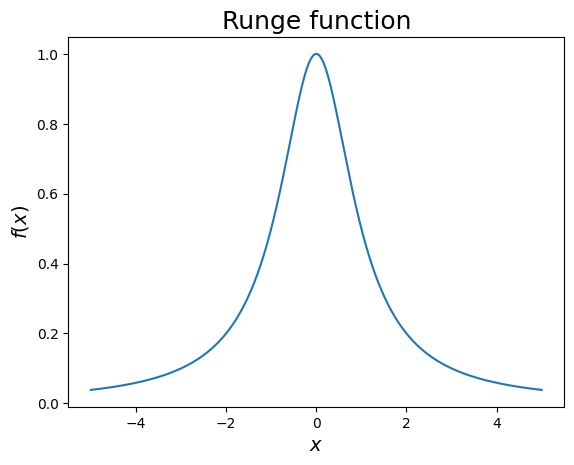

In [9]:
def R(x):
    return 1.0 / (1.0 + x**2)

fig, ax = plt.subplots()
ax.set_title("Runge function", fontsize=18)
ax.set_xlabel(r"$x$", fontsize=14)
ax.set_ylabel(r"$f(x)$", fontsize=14)
ax.plot(x, R(x))

# Lagarange interpolation with uniform grid points

## Interpolation function

In [14]:
def Ln(func, num_interp_pts):
    xi = np.linspace(-5, 5, num_interp_pts)
    yi = func(xi)
    return BarycentricInterpolator(xi, yi)

## $n=3$

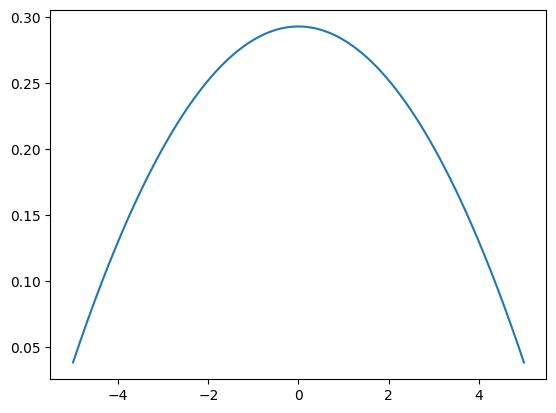

In [7]:
plt.plot(x, Ln(R, 4)(x))

## $n=5$

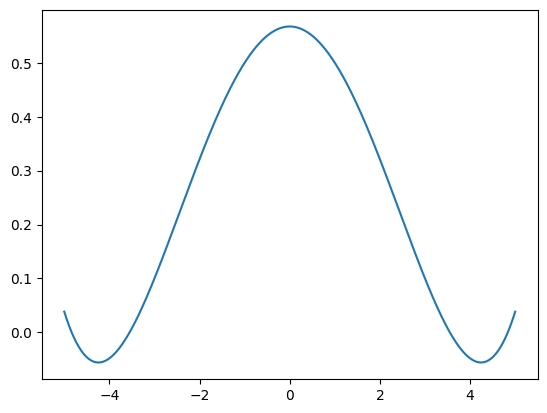

In [8]:
plt.plot(x, Ln(R, 6)(x))

## $n=7$

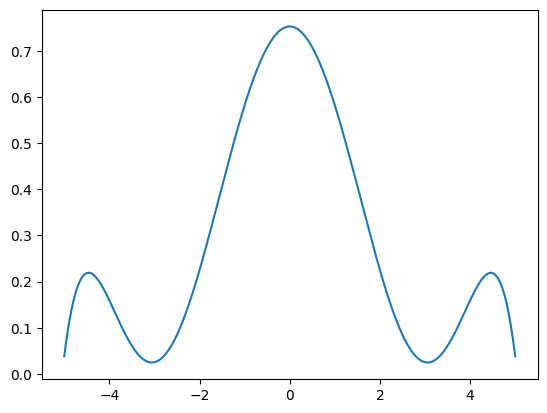

In [9]:
plt.plot(x, Ln(R, 8)(x))

## $n=10$

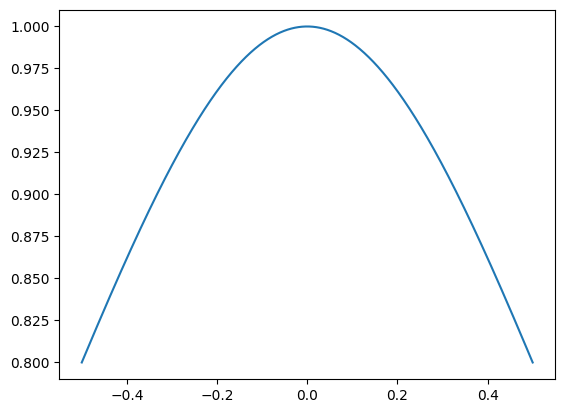

In [6]:
plt.plot(x, Ln(R, 11)(x))

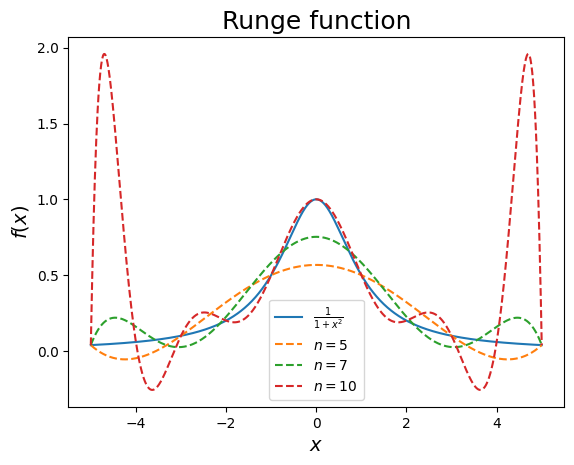

In [17]:
fig, ax = plt.subplots()
ax.set_title("Runge function", fontsize=18)
ax.set_xlabel(r"$x$", fontsize=14)
ax.set_ylabel(r"$f(x)$", fontsize=14)
ax.plot(x, R(x), label=r"$\frac{1}{1+x^2}$")
ax.plot(x, Ln(R, 6)(x), "--", label=r"$n=5$")
ax.plot(x, Ln(R, 8)(x), "--", label=r"$n=7$")
ax.plot(x, Ln(R, 11)(x), "--", label=r"$n=10$")
ax.legend()
plt.show()

In [15]:
def Ln_C(func, num_interp_pts):
#     n = num_interp_pts - 1
#     k = np.linspace(0, n, num_interp_pts)
#     xi = 5 * np.cos(np.pi * (2*k - 1) / (2*n))
#     print(xi)
    xi = 5 * np.polynomial.chebyshev.chebpts1(num_interp_pts)
    yi = func(xi)
    return BarycentricInterpolator(xi, yi)

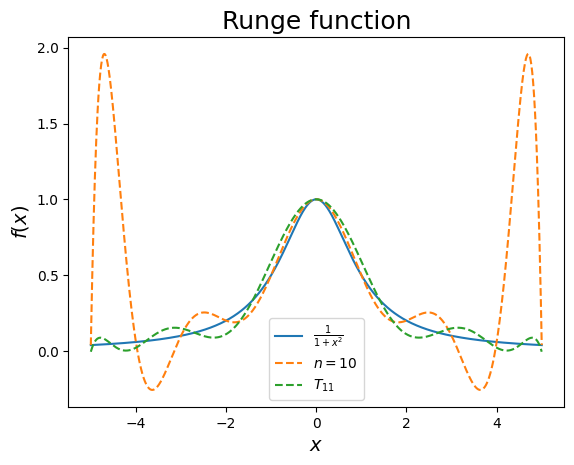

In [16]:
fig, ax = plt.subplots()
ax.set_title("Runge function", fontsize=18)
ax.set_xlabel(r"$x$", fontsize=14)
ax.set_ylabel(r"$f(x)$", fontsize=14)
ax.plot(x, R(x), label=r"$\frac{1}{1+x^2}$")
ax.plot(x, Ln(R, 11)(x), "--", label=r"$n=10$")
ax.plot(x, Ln_C(R, 11)(x), "--", label=r"$T_{11}$")
ax.legend()
plt.show()
# plt.savefig("runge.pdf")